# Fraggler tutorial

Using data in the `demo` folder

# Imports

In [2]:
import fraggler
from pathlib import Path
import pandas as pd

# Fsa file

In [3]:
fsa = fraggler.FsaFile(
    file="demo/multiplex.fsa", 
    ladder="LIZ",
)

## Have a look a at the fsa object:

In [4]:
fsa


            FsaFile-object with following parameters:
            
            File: demo/multiplex.fsa
            Filename: multiplex.fsa
            Size standard channel: DATA205
            Ladder name: LIZ
            Number of ladder steps: 35
            Minimum interpeak distance: 30
            Minimum height: 100
            Minimum Ladder trace distance: 300
            Maximum peak count: 38
            Normalized data: False
            Trace Channel: DATA1
            Ladder Sizes: [ 20  40  60  80 100 114 120 140 160 180 200 214 220 240 260 280 300 314
 320 340 360 380 400 414 420 440 460 480 500 514 520 540 560 580 600]
            

## Ladder assigner and model

In [5]:
ladder_assigner = fraggler.PeakLadderAssigner(fsa)
model = fraggler.FitLadderModel(ladder_assigner)

# Plotting

## Look at the raw data

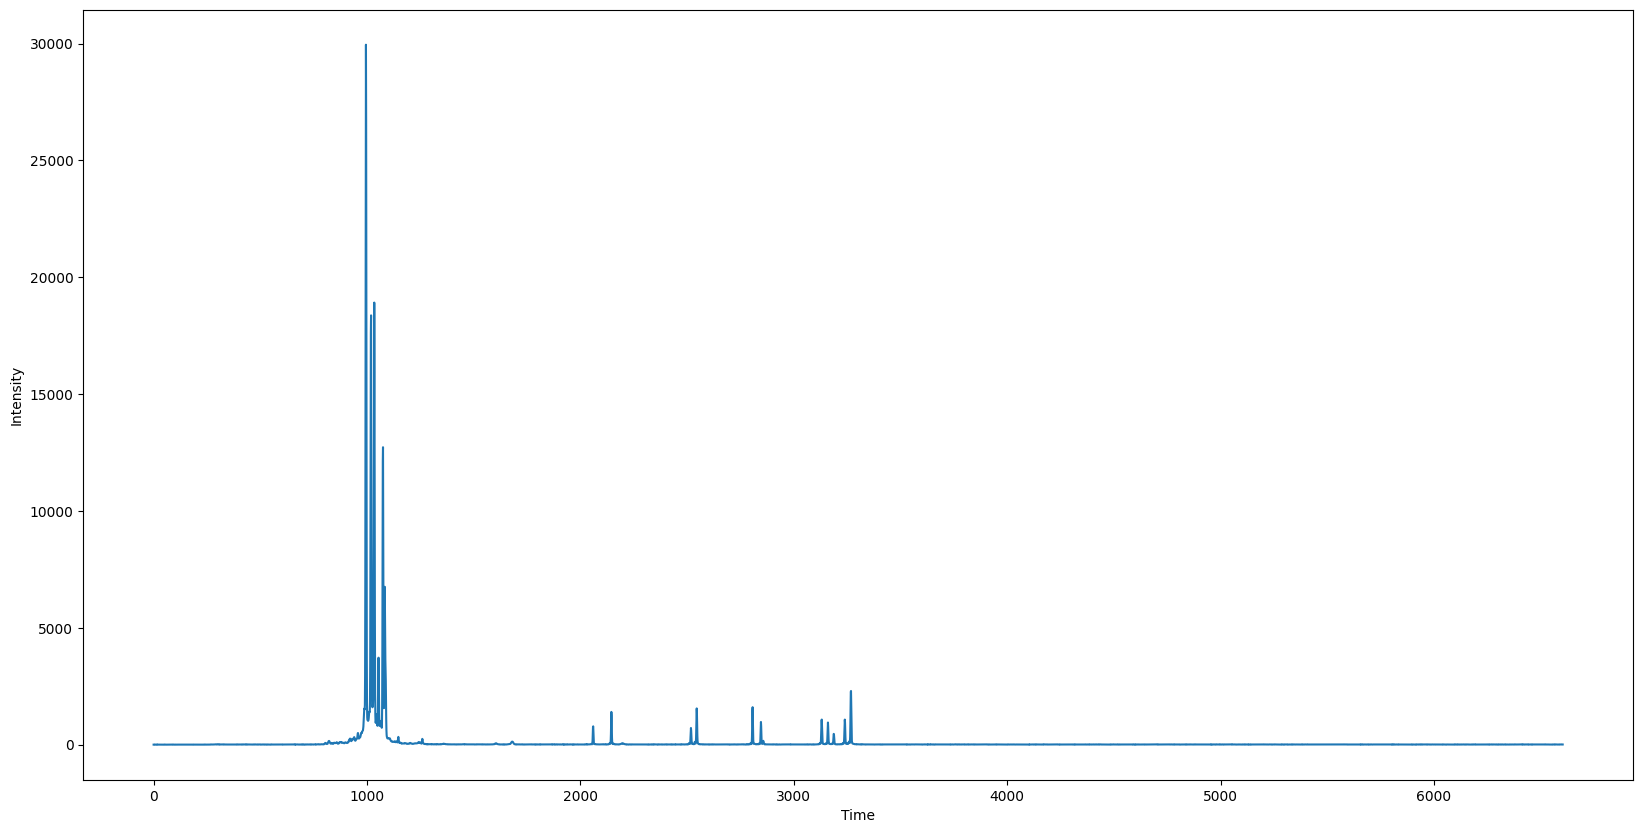

In [6]:
fraggler.PlotRawData(fsa).plot_raw_data

## Plot the ladder and the fit of the model

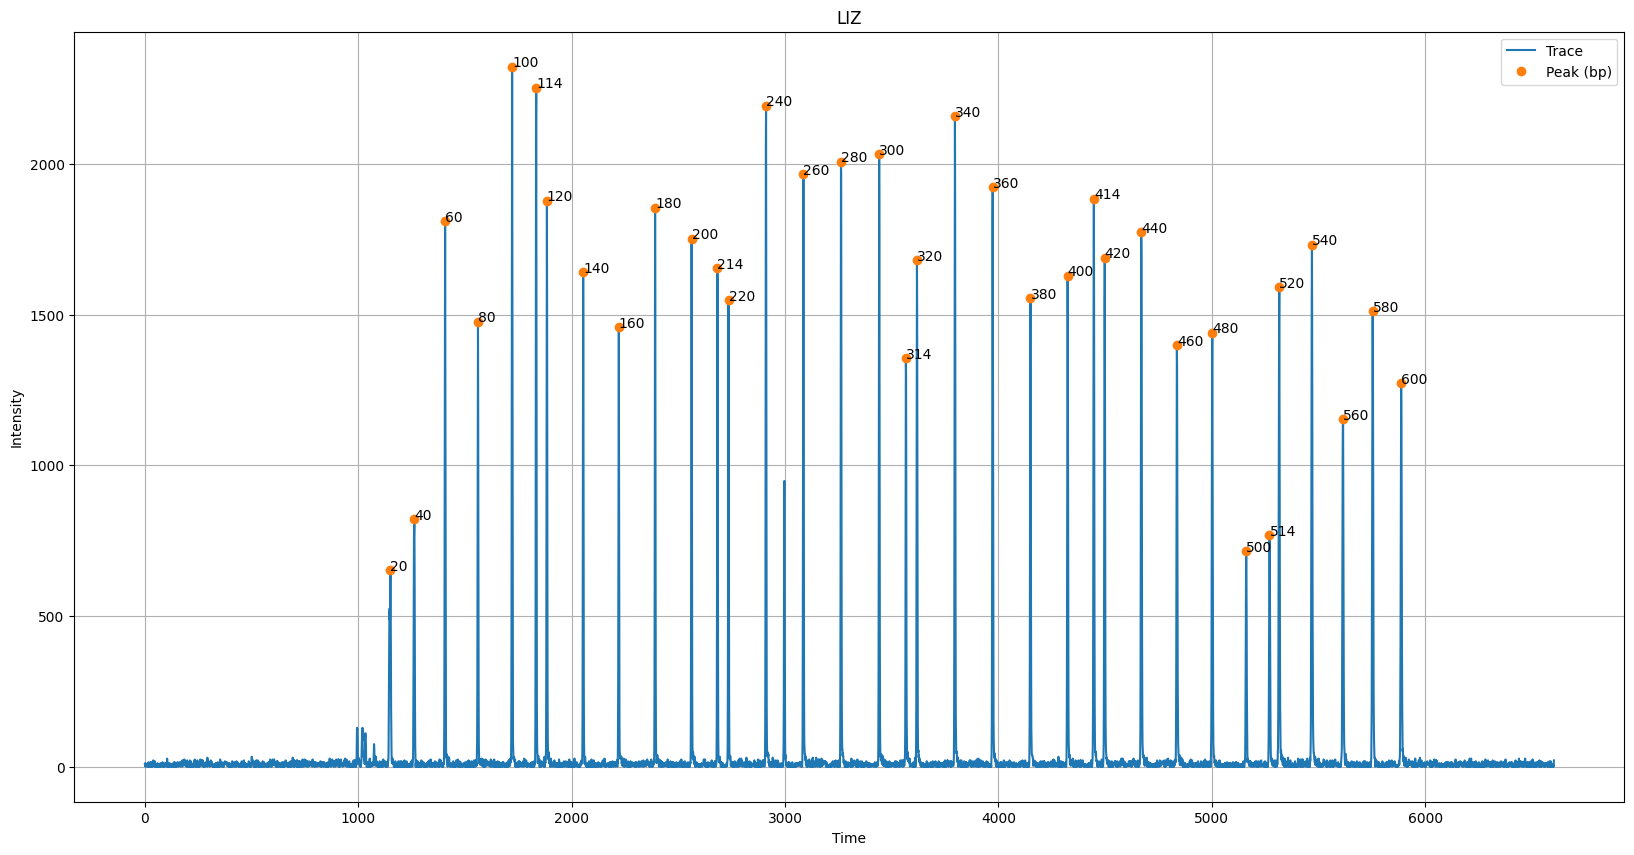

In [7]:
fraggler.PlotLadder(model).plot_ladder_peaks

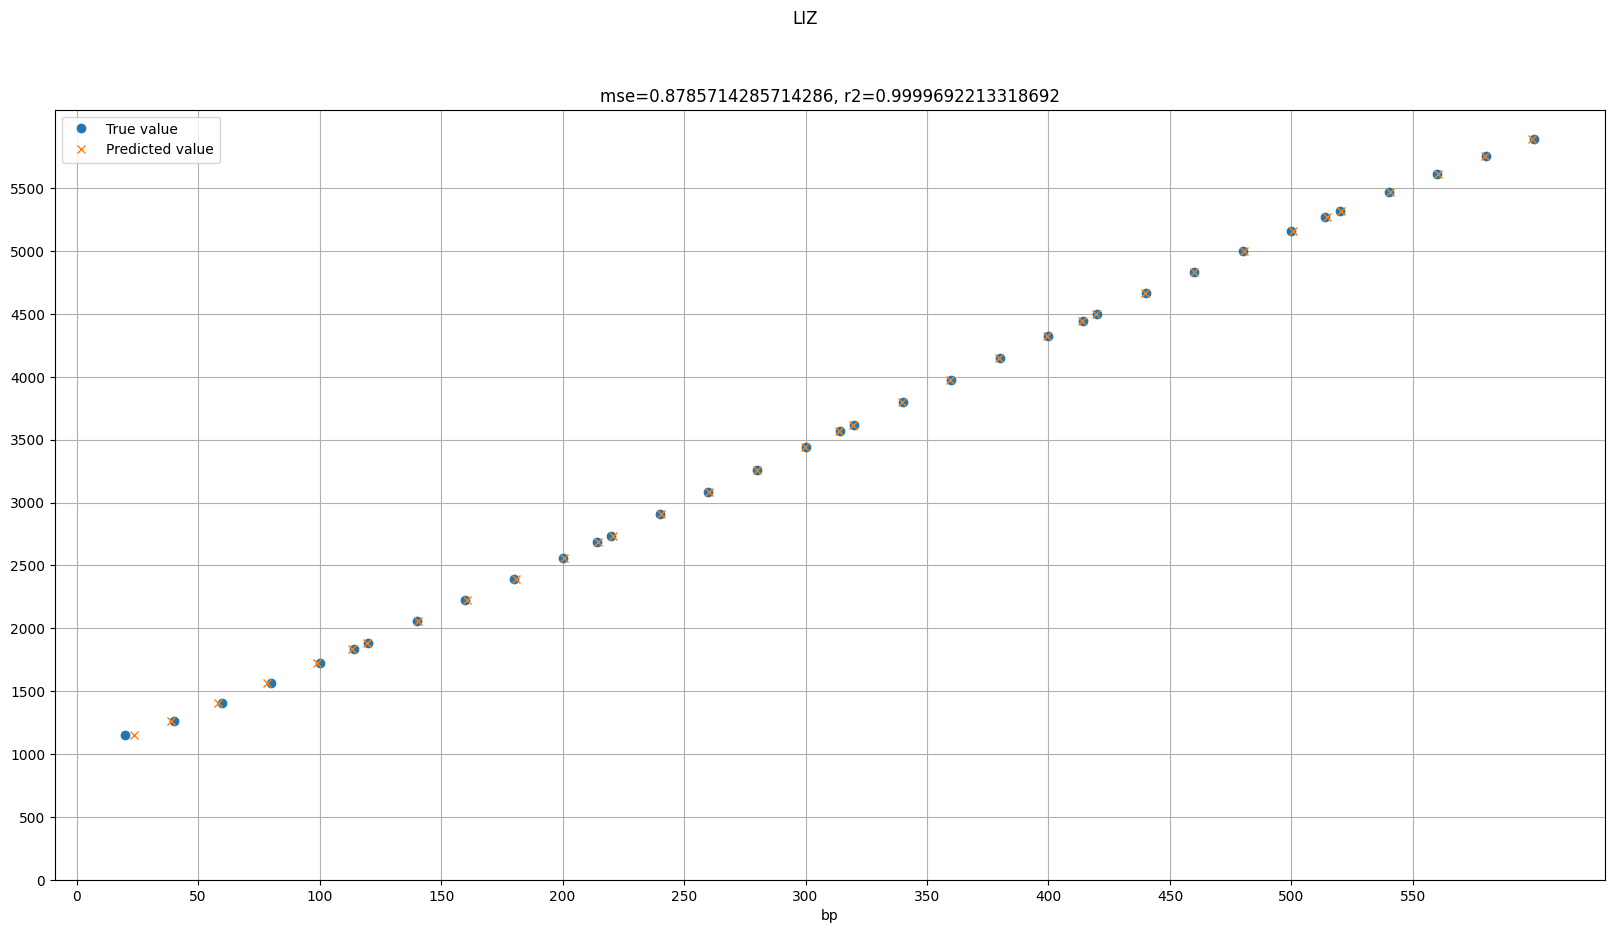

In [8]:
fraggler.PlotLadder(model).plot_model_fit

# Peak Areas

### Two different ways of finding peaks
1. Agnostic
2. Customized peak table

## 1. Agnostic


* Finds peaks without the user having to specify peaks and intervals (default option)

In [9]:
pam = fraggler.PeakAreaDeMultiplex(model)

## Plot all peaks found in the fsa file

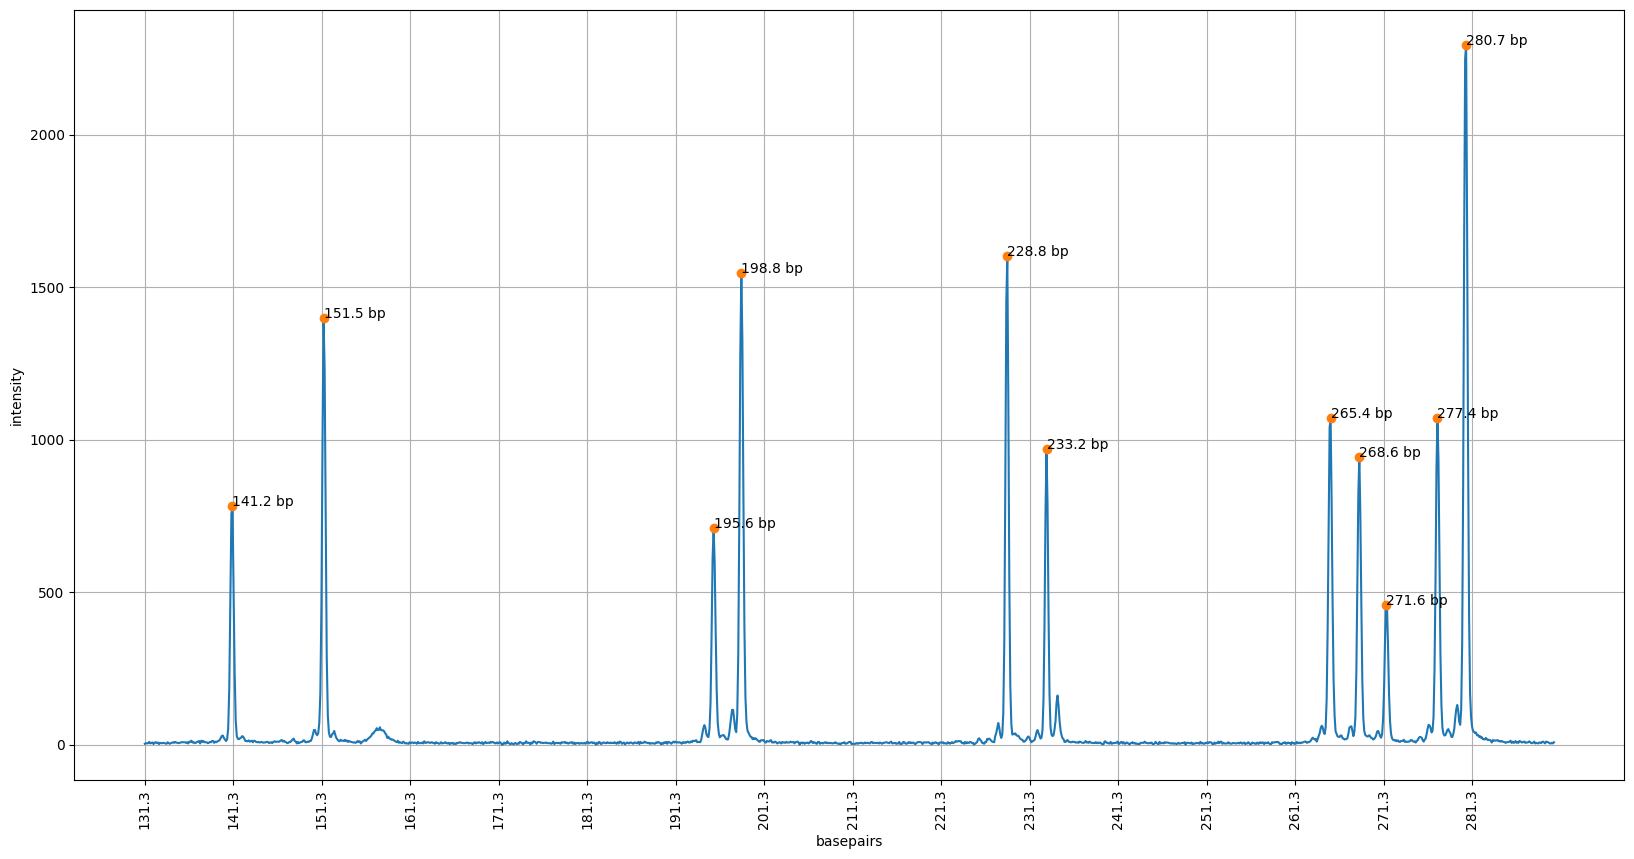

In [10]:
fraggler.PlotPeakArea(pam).plot_peaks()

## 2. Custom Peak table

The custom peak table must be a csv file and contain:
- name: name of the assay
- start: where the interval starts
- stop: where the interval stops
- amount: amount of peaks. A number of empty

In [11]:
# following peak table only specifies 1 peak in amount.
pam2 = fraggler.PeakAreaDeMultiplex(model, custom_peaks="tests/custom_peaks.csv")

# You can also pass the table as a pd.DataFrame:
peaks = pd.read_csv("tests/custom_peaks.csv")
pam3 = fraggler.PeakAreaDeMultiplex(model, custom_peaks=peaks)
display(peaks)

,name,start,stop,amount
0,prt1,210,240,1


## Plot the peaks again (this time only one)

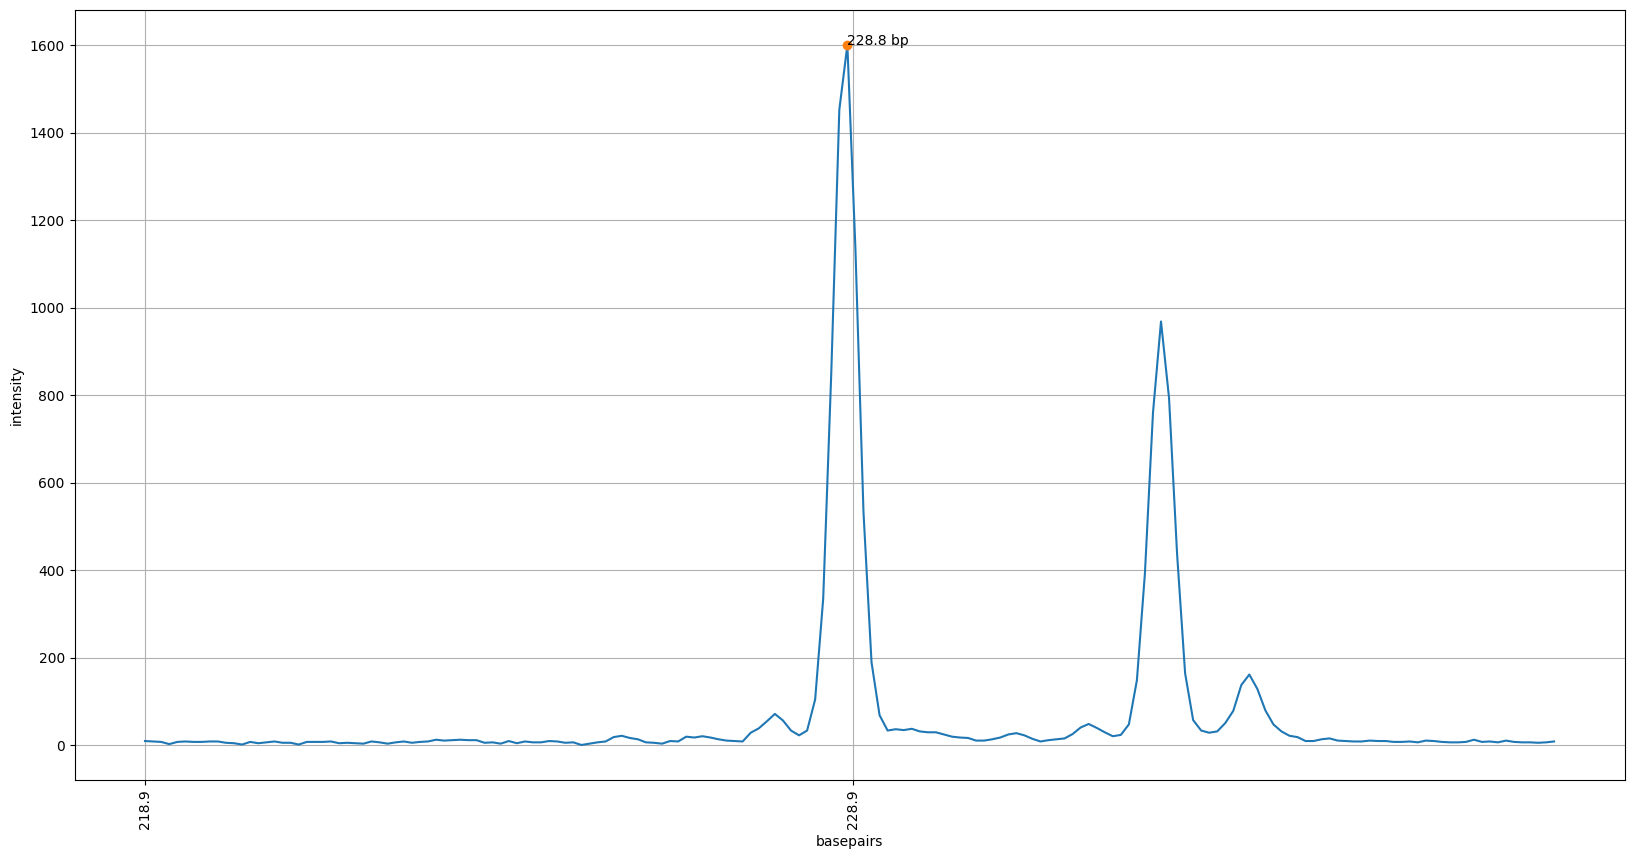

In [12]:
fraggler.PlotPeakArea(pam2).plot_peaks()

## Plot the peak areas and the ratio of the peaks in all the assays

Use different models:
- "gauss"
- "voigt"

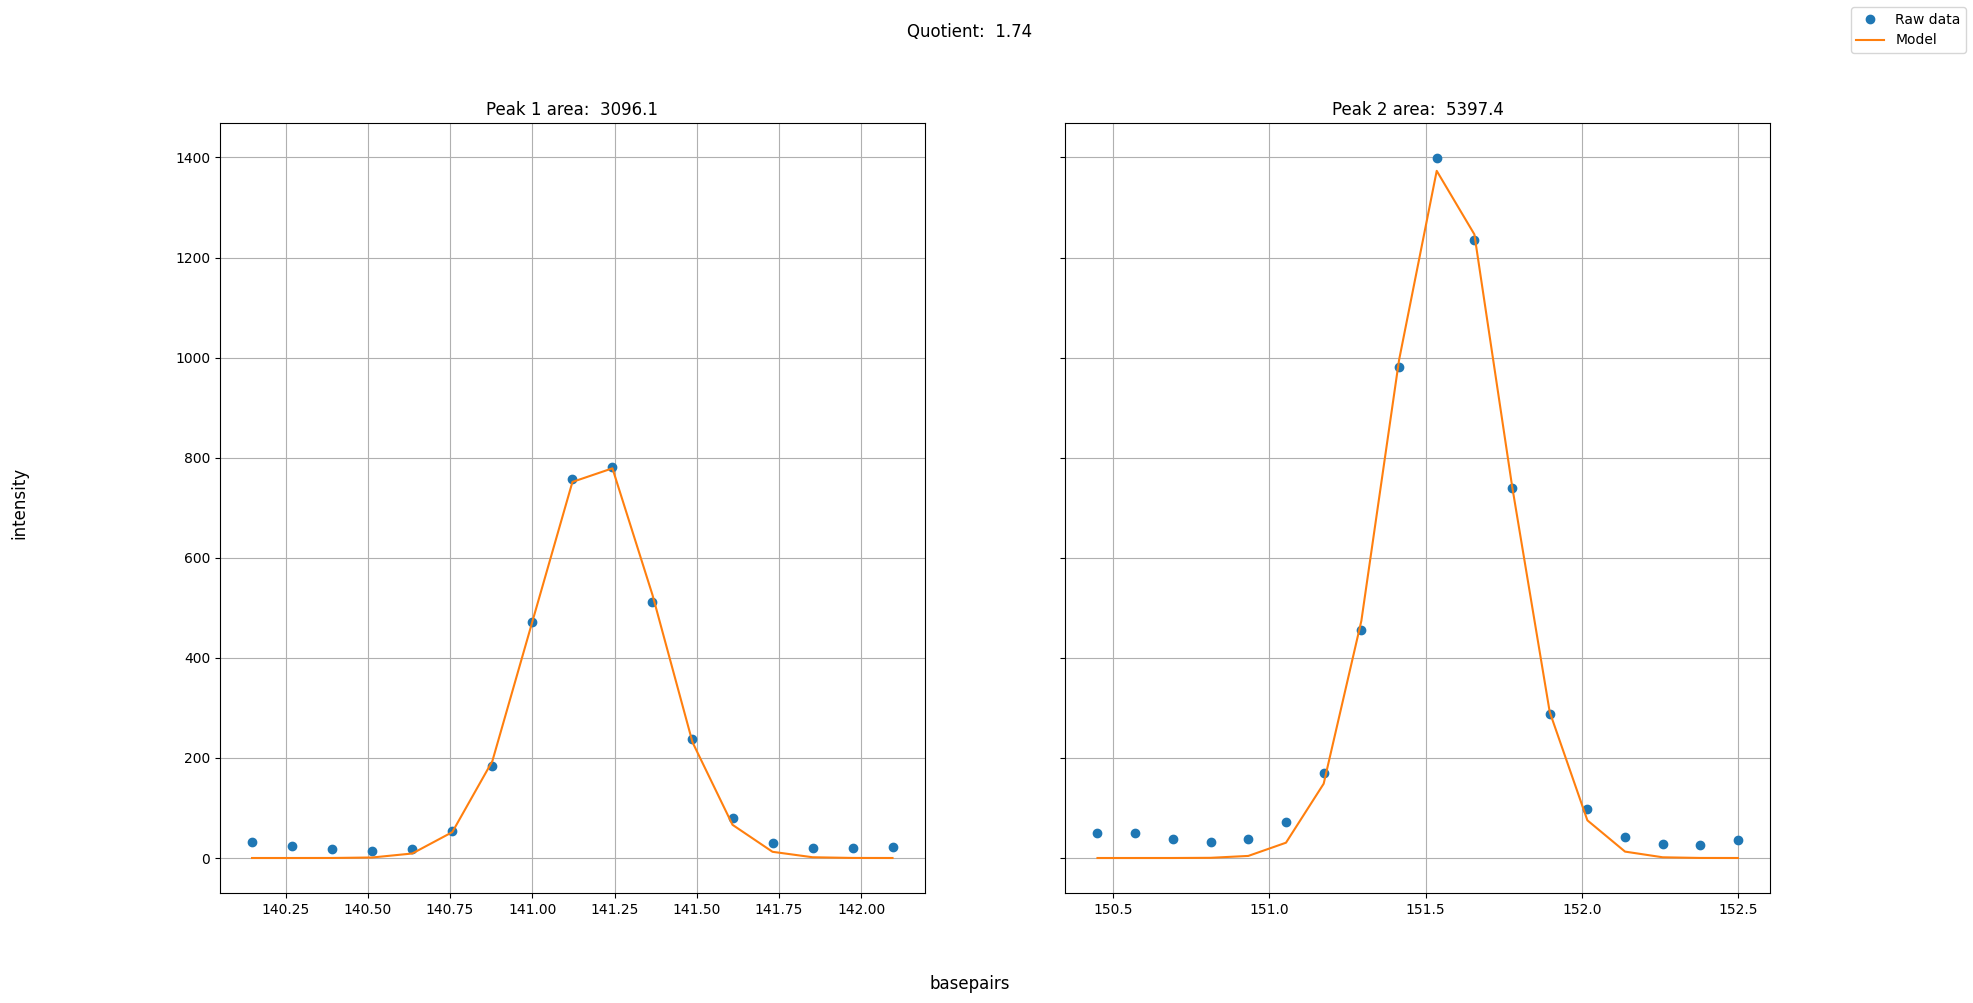

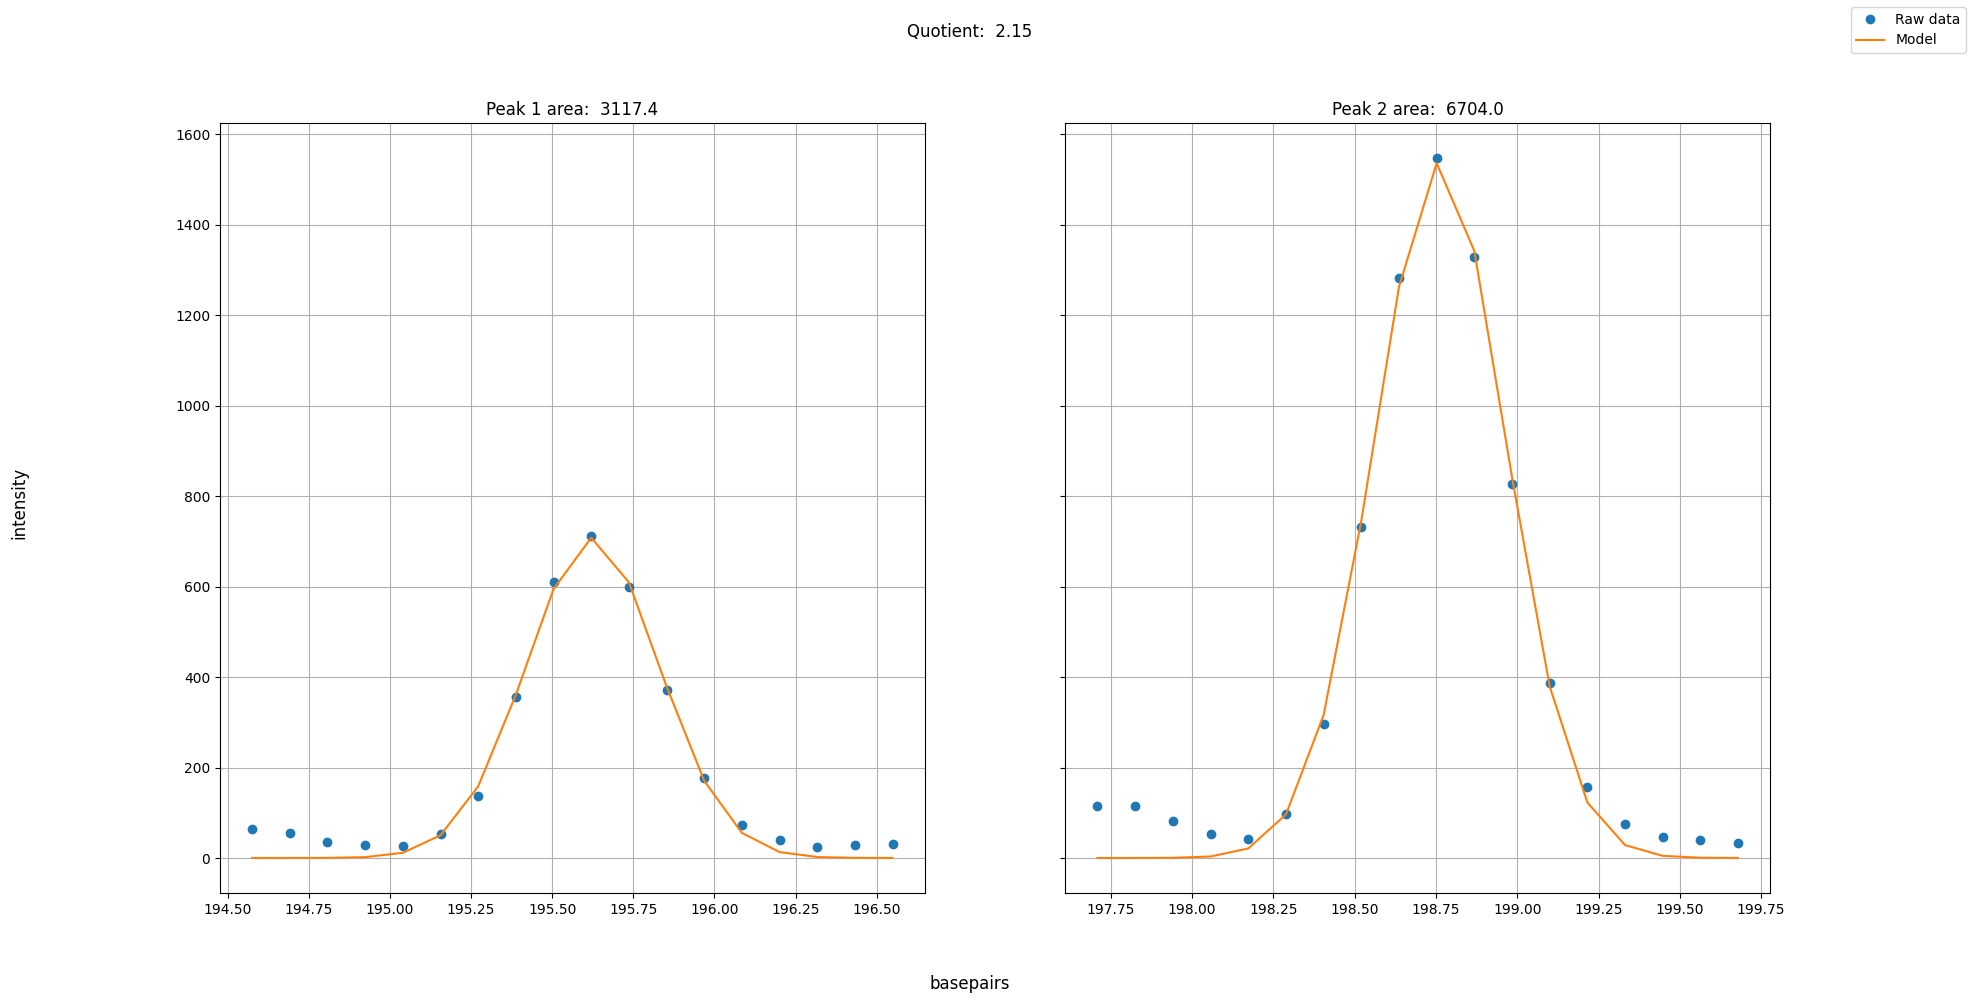

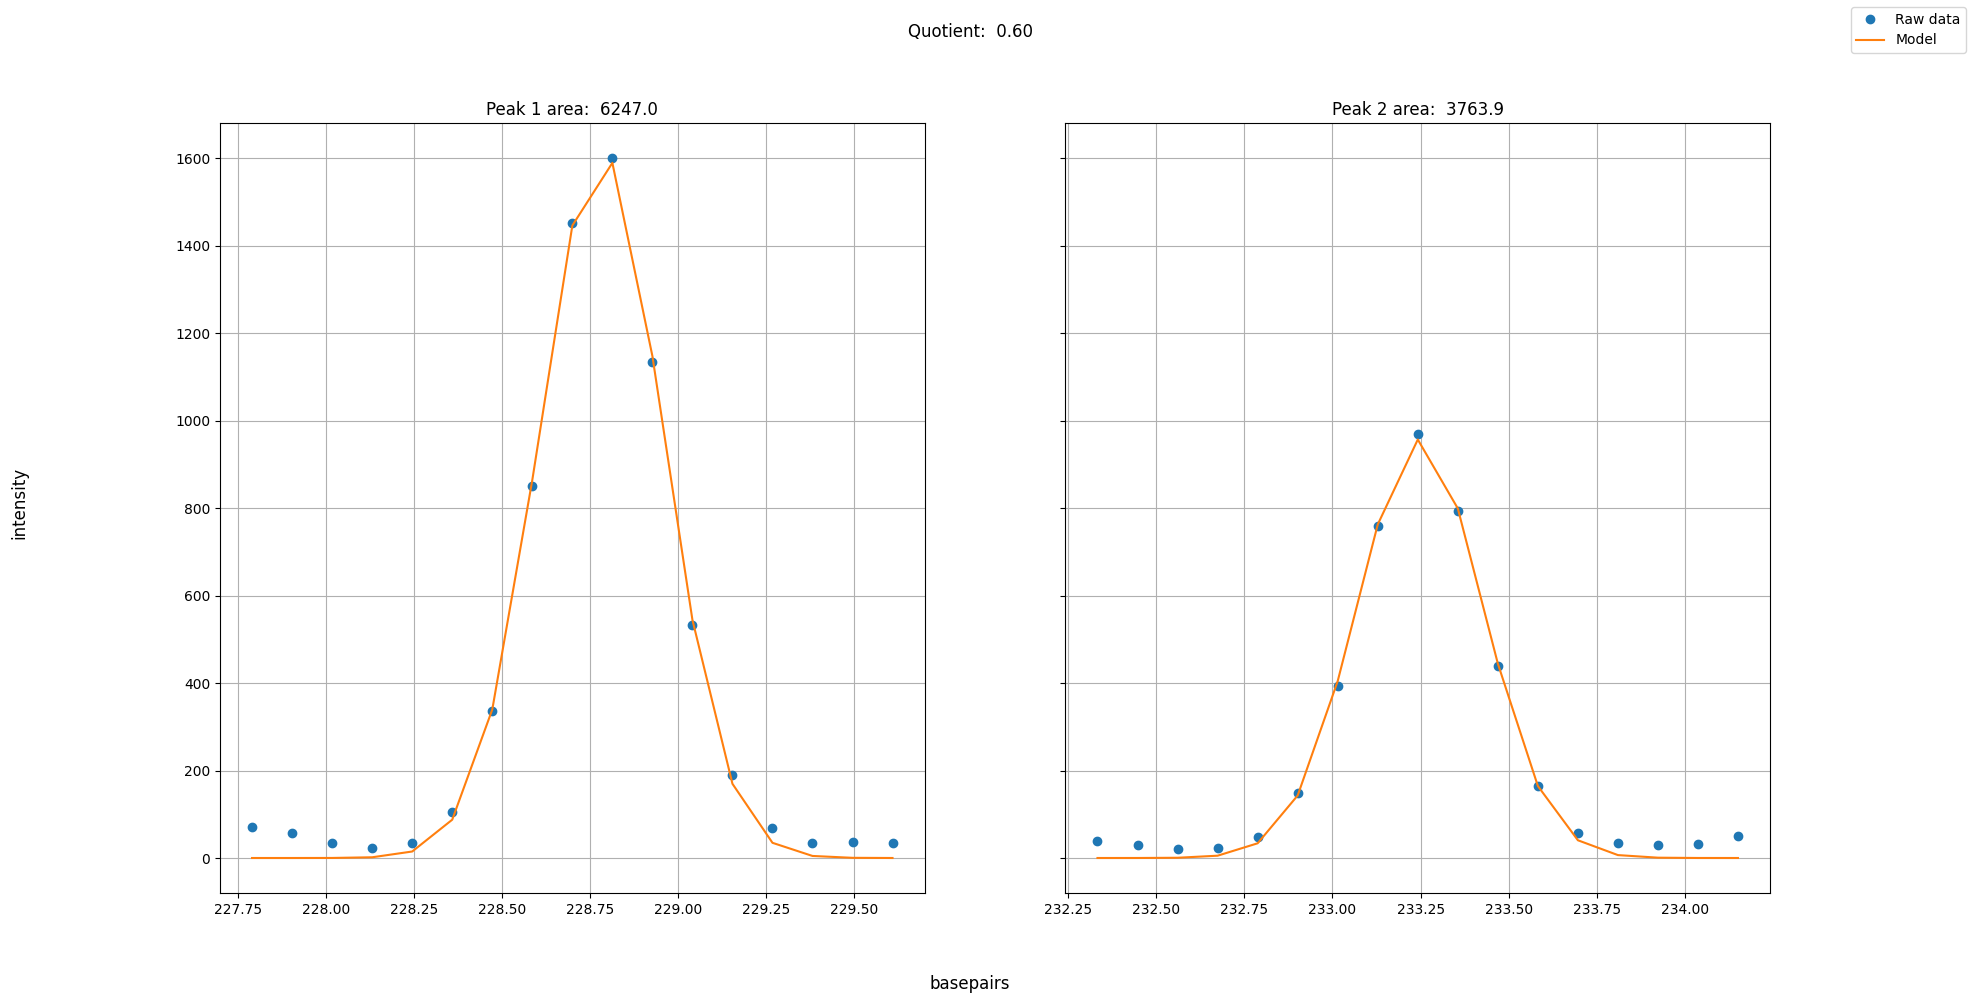

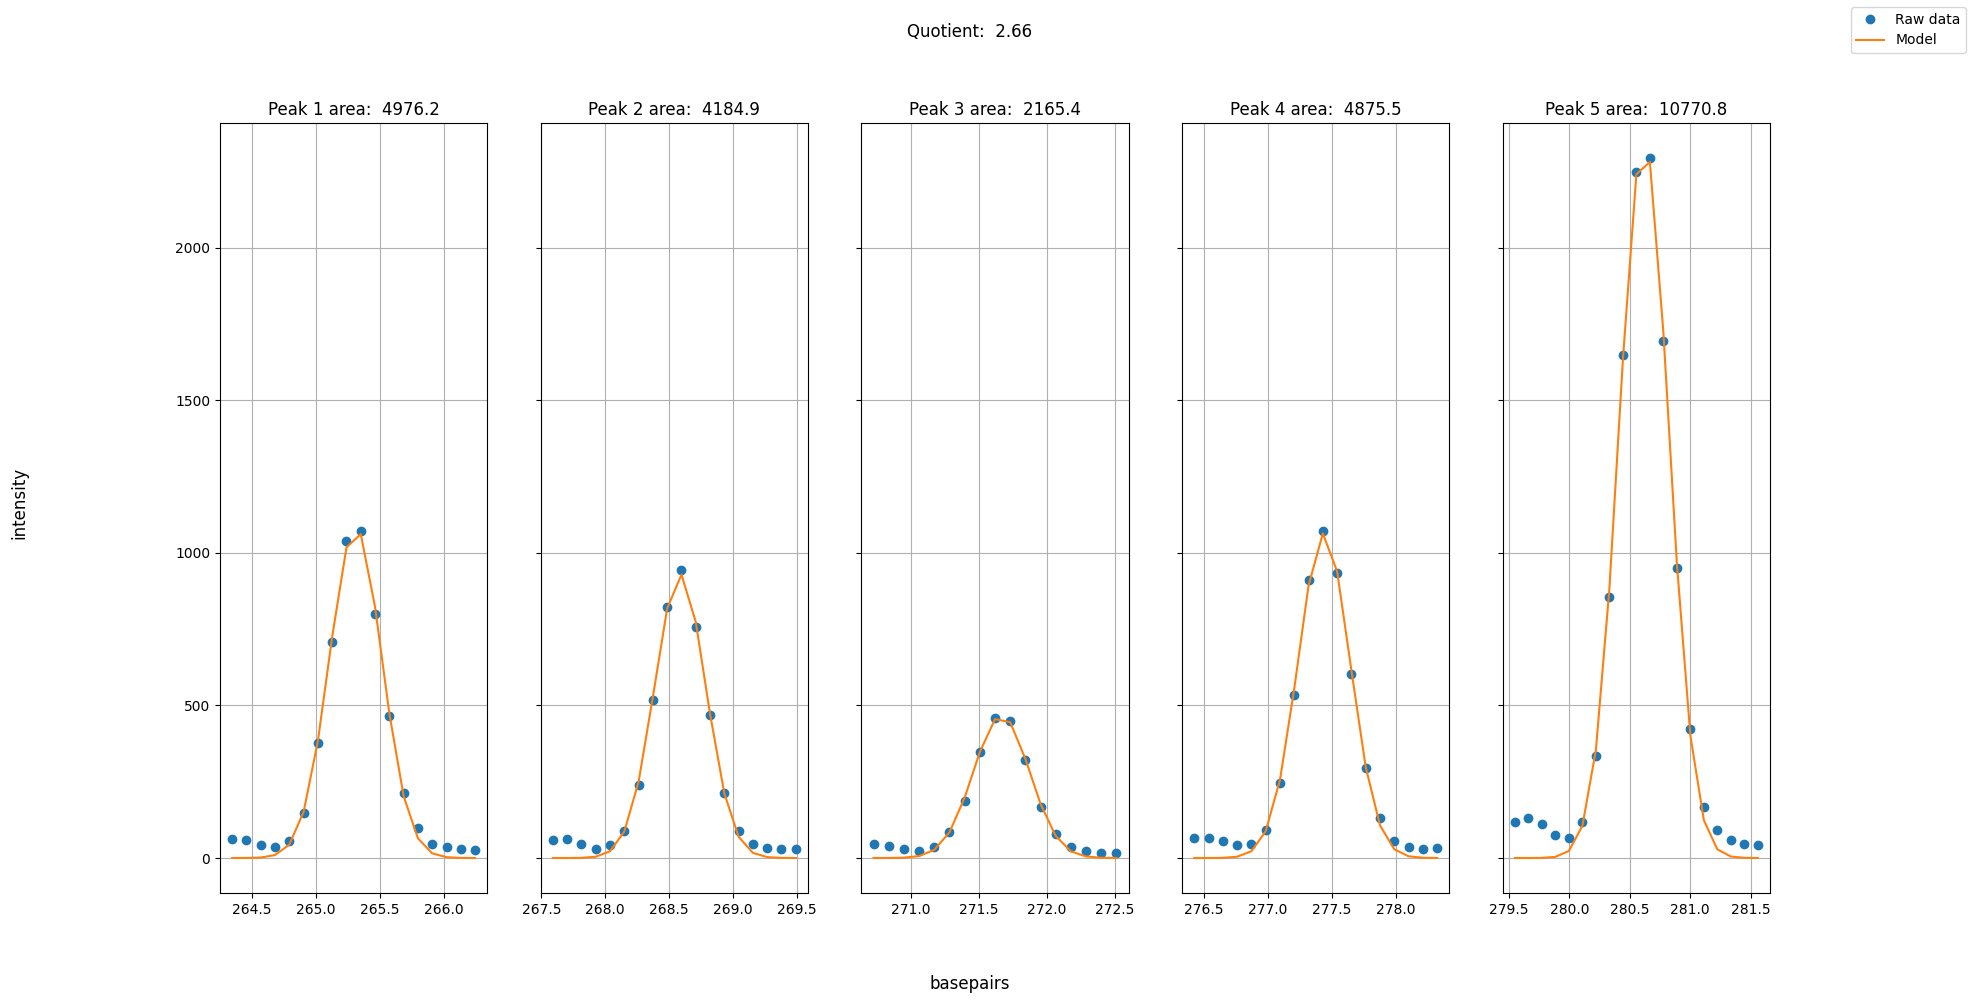

In [13]:
for i in pam:
    plot = fraggler.PlotPeakArea(pam).plot_areas(assay_number=i, peak_finding_model="gauss")
    display(plot)

## Look at the peak dataframe

In [14]:
pam.assays_dataframe()

,peak_height,basepairs,fitted_peak_height,model,area,r_value,peak_name,file_name,quotient,peak_number,assay_number
0,782,141.243777,778.813628,gauss,3096.099821,0.996,Peak 1,multiplex.fsa,1.743288,2,1
1,1399,151.535212,1373.319202,gauss,5397.392905,0.995,Peak 2,multiplex.fsa,1.743288,2,1
2,711,195.620268,708.327778,gauss,3117.435136,0.985,Peak 1,multiplex.fsa,2.150499,2,2
3,1548,198.752176,1536.496454,gauss,6704.042427,0.989,Peak 2,multiplex.fsa,2.150499,2,2
4,1601,228.812187,1589.835105,gauss,6247.019490,0.996,Peak 1,multiplex.fsa,0.602506,2,3
5,969,233.241906,957.101153,gauss,3763.868059,0.994,Peak 2,multiplex.fsa,0.602506,2,3
6,1071,265.350946,1061.563762,gauss,4976.180348,0.992,Peak 1,multiplex.fsa,2.659141,5,4
7,945,268.597746,928.923238,gauss,4184.904717,0.990,Peak 2,multiplex.fsa,2.659141,5,4
8,459,271.618102,455.113395,gauss,2165.358835,0.984,Peak 3,multiplex.fsa,2.659141,5,4
9,1070,277.428963,1063.774796,gauss,4875.451355,0.991,Peak 4,multiplex.fsa,2.659141,5,4


## Look at the fit reports of the model for each peak

In [15]:
for r in pam.fit_report:
    print(r)
    print("")

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 18
    # variables        = 3
    chi-square         = 15951.5450
    reduced chi-square = 1063.43633
    Akaike info crit   = 128.164906
    Bayesian info crit = 130.836021
    R-squared          = 0.99293064
[[Variables]]
    amplitude:  4976.18035 +/- 101.853437 (2.05%) (init = 4698)
    center:     3130.64099 +/- 0.04336039 (0.00%) (init = 3130.5)
    sigma:      1.83461400 +/- 0.04336040 (2.36%) (init = 1.5)
    fwhm:       4.32018575 +/- 0.10210593 (2.36%) == '2.3548200*sigma'
    height:     1082.08529 +/- 22.1483204 (2.05%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 18
    # variables        = 3
    chi-square         = 14996.

# Report generating 

Use inside python script or use the CLI tool (see below)

In [16]:
fraggler.peak_area_report?

Signature:
fraggler.peak_area_report(
    fsa_file: str,
    ladder: str,
    folder: str,
    peak_model: str,
    min_interpeak_distance: int = 30,
    min_height: int = 100,
    min_ratio: float = 0.1,
    trace_channel: str = 'DATA9',
    search_peaks_start: int = 100,
    cutoff: float = None,
    peak_height: int = 200,
    custom_peaks: str = None,
) -> int
Docstring:
Generates an HTML report for the fragment analysis of an FSA file, including peak area data and plots.

Parameters:
-----------
fsa_file : str
    The path to the FSA file to be analyzed.
ladder : str
    The name of the ladder used in the FSA file.
folder : str
    The path to the output folder where the report will be saved.
peak_model : str
    The peak finding model used to identify peaks.

Returns:
--------
int
    An integer representing the status of the report generation:
    - 0 if successful
    - 1 if no peaks were found

Raises:
-------
FileNotFoundError
    If the specified FSA file cannot be found.
IO

# Peak table generating

Use inside python script or use the CLI tool (see below)

In [17]:
fraggler.generate_peak_table?

Signature:
fraggler.generate_peak_table(
    in_files: str | list,
    ladder: str,
    peak_model: str,
    min_height: int = 100,
    cutoff: int = 175,
    min_ratio: float = 0.3,
    trace_channel: str = 'DATA9',
    custom_peaks: str = None,
) -> pandas.core.frame.DataFrame
Docstring:
Generate a combined dataframe of peaks for all input files.

Args:
    in_files (Union[str, List[str]]): Path(s) to the input .fsa files, or a directory containing them.
    ladder (str): The ladder used for the fragment analysis.
    peak_model (str): The peak model used for peak area calculations.
    min_height (int, optional): The minimum peak height required for detection. Defaults to 100.
    cutoff (int, optional): The cutoff value for peak area calculations. Defaults to 175.
    min_ratio (float, optional): The minimum ratio required for peak detection. Defaults to 0.3.
    trace_channel (str, optional): The channel used for trace data. Defaults to "DATA9".

Returns:
    pandas.DataFrame: A c

# CLI Tool

### For use of the CLI tool, please see the documentation